In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X,y=make_blobs(n_samples=500,centers=5,random_state=3)

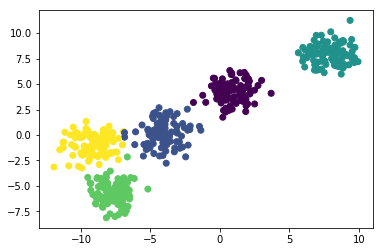

In [3]:
plt.figure(0)
plt.scatter(X[:,0],X[:,1],c=y)

In [4]:
k=5
color=["green","red","blue","yellow","orange"]
clusters={}
for kx in range(k):
    center=10*(2*np.random.random((X.shape[1],))-1)
    points=[]
    
    
    cluster={
        'center':center,
        'points':points,
        'color':color[kx]
    }
    clusters[kx]=cluster
    

In [5]:
clusters

{0: {'center': array([-4.08486855, -7.2977582 ]),
  'color': 'green',
  'points': []},
 1: {'center': array([-2.05406718, -9.65190386]),
  'color': 'red',
  'points': []},
 2: {'center': array([-6.95338849,  5.12937458]),
  'color': 'blue',
  'points': []},
 3: {'center': array([-5.26395454, -4.14393766]),
  'color': 'yellow',
  'points': []},
 4: {'center': array([-4.29644313, -0.43497189]),
  'color': 'orange',
  'points': []}}

In [6]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [7]:
#v1=np.array([1,2])
#v2=np.array([3,5])
#distance(v1,v2)

In [8]:
#assign every data point  to each cluster
#for one point disatnce is calculated from every cluster center
def assignPoinTtoClusters(clusters):#e-step  
    for ix in range(X.shape[0]):
        dist=[]
        curr_x=X[ix]
        for kx in range(k):
            d=distance(curr_x,clusters[kx]['center'])
            dist.append(d)
        current_cluster=np.argmin(dist)
    
        clusters[current_cluster]['points'].append(curr_x)

In [9]:
def updateclusters(clusters):#m-step
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        if pts.shape[0]>0:
            new_u=pts.mean(axis=0)
            clusters[kx]['center']=new_u
            clusters[kx]['points']=[]
                       
def plotclusters(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        print(pts.shape)
        #plot the points
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        #print(len(clusters[kx]['points']))
        uk=clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*")

(101, 2)
(0,)
(100, 2)
(175, 2)
(124, 2)


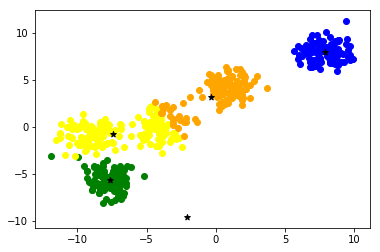

In [16]:
#as there is random initialisation of centres so this leads to case,where there isfailure of k-means
assignPoinTtoClusters(clusters)
#updateclusters(clusters)
plotclusters(clusters)
updateclusters(clusters)

using scikit learn


In [18]:
X,y=make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

In [20]:
from sklearn.cluster import KMeans

In [22]:
kmeans=KMeans(n_clusters=5)

In [30]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
centers=kmeans.cluster_centers_
print(centers)

[[-7.6726196  -5.69211059]
 [ 0.88641907  4.19441853]
 [ 7.8649674   7.97988109]
 [-9.0671623  -0.96740759]
 [-3.97953526  0.19458336]]


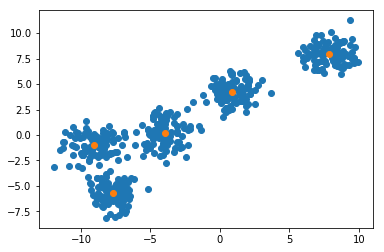

In [34]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(centers[:,0],centers[:,1])